In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pcos_woinfertile=pd.read_excel("PCOS_data_without_infertility.xlsx",sheet_name="Full_new")
pcos_infertile=pd.read_csv(r'PCOS_infertility.csv')

In [3]:
pcos_woinfertile.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [4]:
pcos_infertile.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [5]:
pcos = pd.merge(pcos_woinfertile, pcos_infertile, on='Patient File No.', suffixes=('', '_wo'), how='left')


In [6]:
pcos =pcos.drop(['Unnamed: 44', 'Sl. No_wo', 'PCOS (Y/N)_wo', '  I   beta-HCG(mIU/mL)_wo','II    beta-HCG(mIU/mL)_wo', 'AMH(ng/mL)_wo',"Sl. No","Patient File No."], axis=1)
pcos = pcos.rename(columns = {"PCOS (Y/N)":"PCOS"})
pcos.head() 

,PCOS,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [7]:
pcos.shape

(541, 42)

In [8]:
pcos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS                    541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [9]:
pcos.isnull().sum()

PCOS                      0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [10]:
pcos["AMH(ng/mL)"] = pd.to_numeric(pcos["AMH(ng/mL)"], errors='coerce')
pcos["II    beta-HCG(mIU/mL)"] = pd.to_numeric(pcos["II    beta-HCG(mIU/mL)"], errors='coerce')

In [11]:
pcos = pcos.dropna(subset=['Marraige Status (Yrs)'])
pcos = pcos.dropna(subset=['Fast food (Y/N)'])
pcos = pcos.dropna(subset=['II    beta-HCG(mIU/mL)'])
pcos = pcos.dropna(subset=['AMH(ng/mL)'])

In [12]:
pcos.isnull().sum()

PCOS                      0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

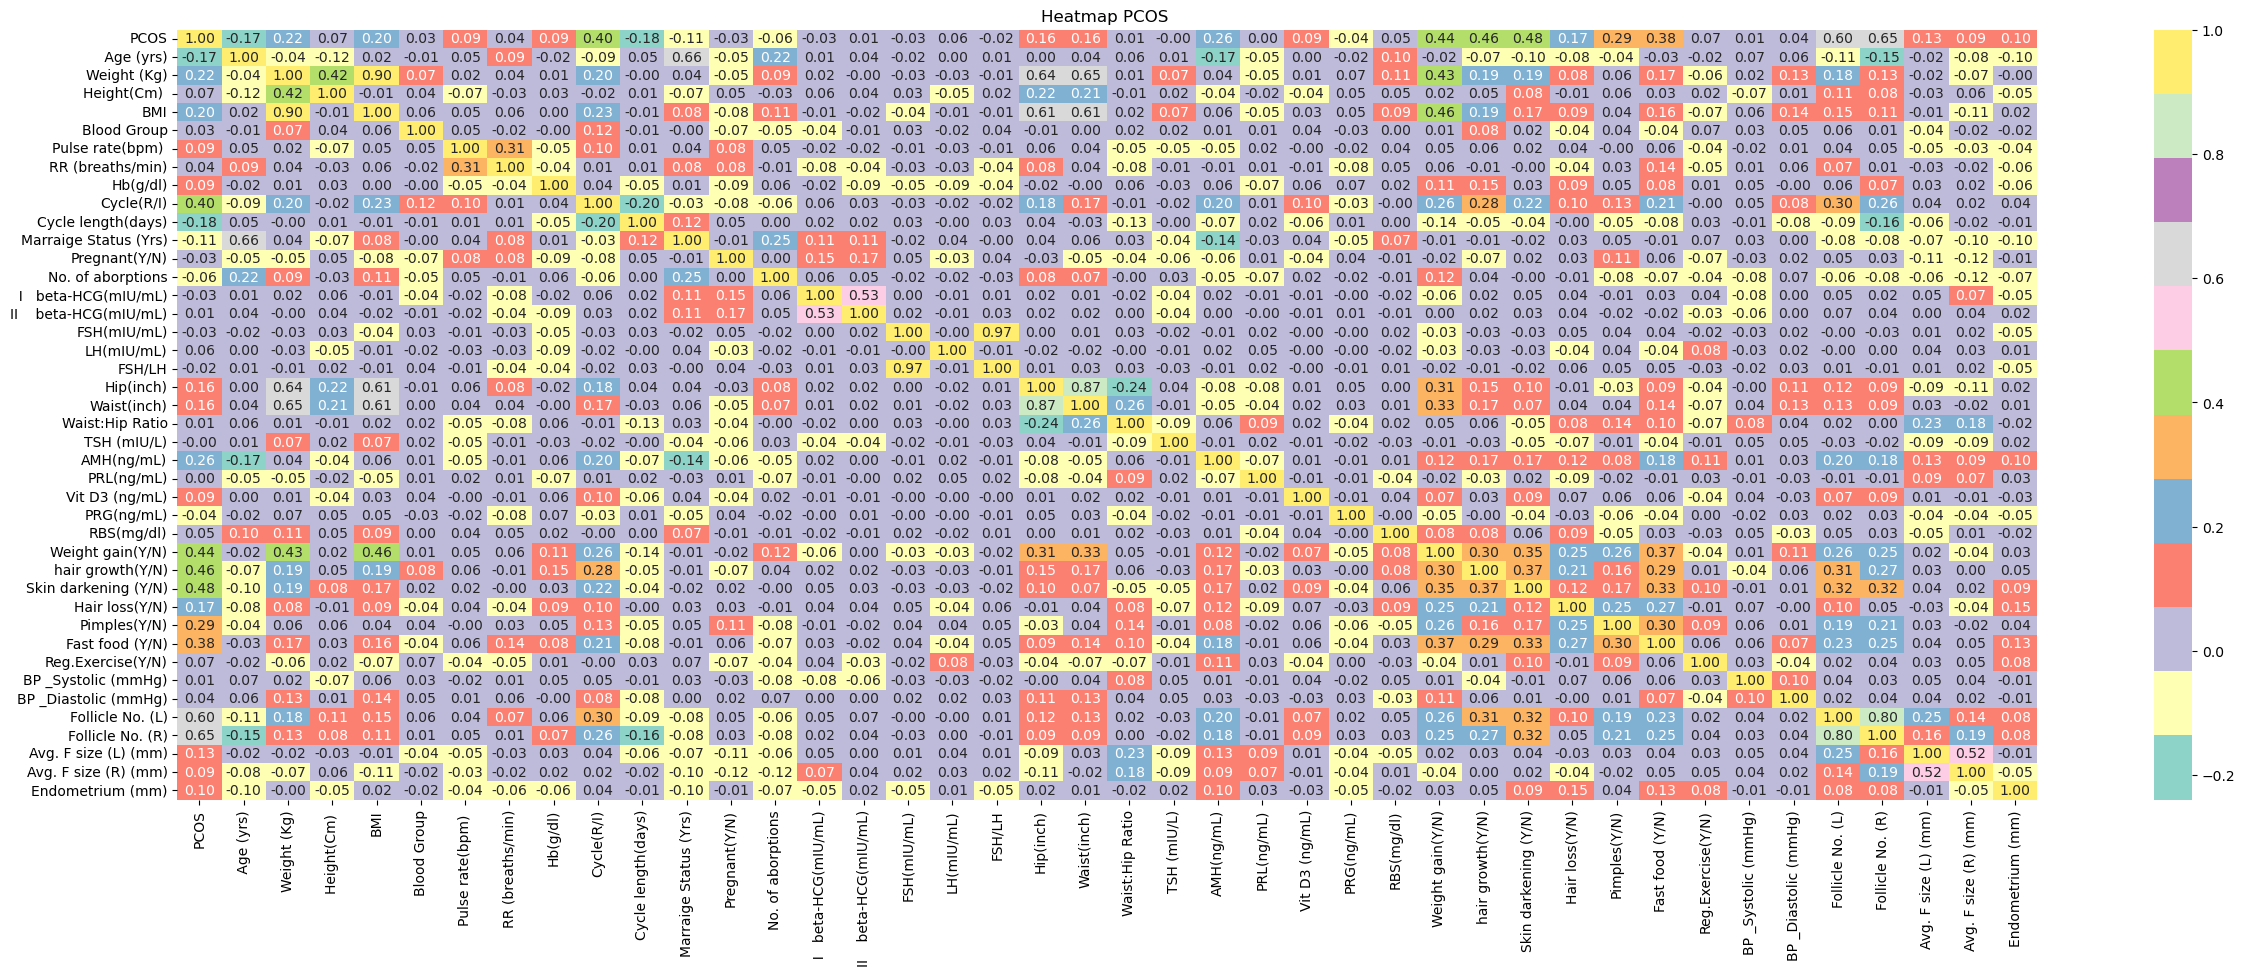

In [13]:
corr_matrix= pcos.corr()
plt.subplots(figsize=(30,10))
sns.heatmap(corr_matrix,cmap="Set3", annot = True, fmt = ".2f");
plt.title("Heatmap PCOS ")
plt.show()

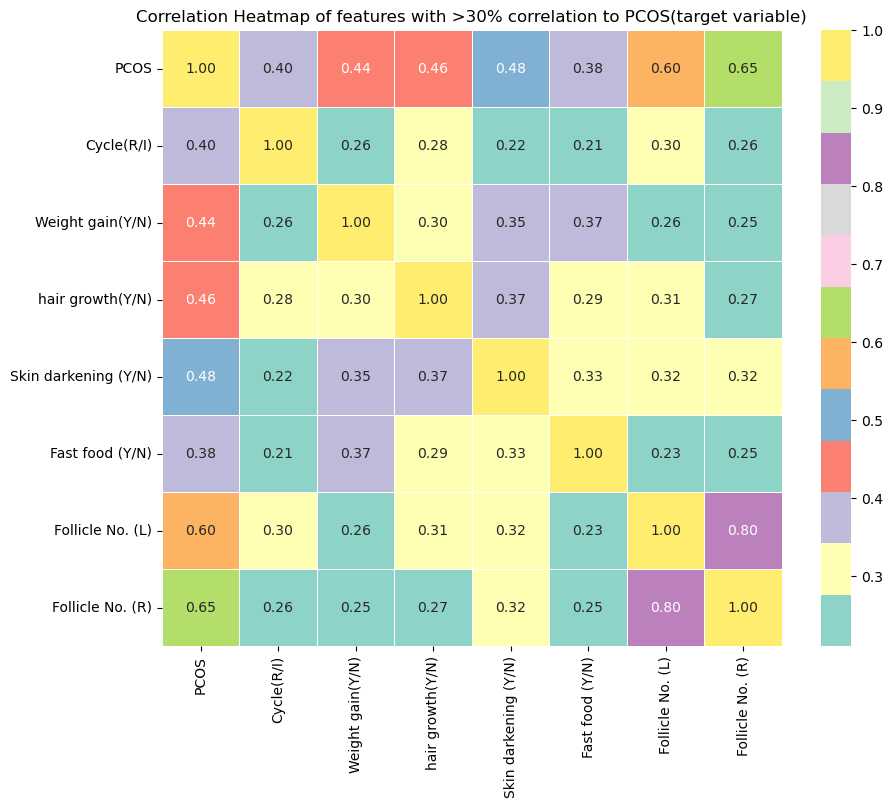

In [14]:
selected_features = corr_matrix.index[abs(corr_matrix['PCOS']) > 0.30].tolist()

# Create a correlation matrix for the selected features
filtered_corr_matrix = pcos[selected_features].corr()

# Plot the heatmap with numeric annotations and "Set3" color palette
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap="Set3", fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap of features with >30% correlation to PCOS(target variable)')
plt.show()

In [15]:
pcos_filtered = pcos[selected_features]

In [35]:
pcos_filtered.head()

,PCOS,Cycle(R/I),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Fast food (Y/N),Follicle No. (L),Follicle No. (R)
0,0,2,0,0,0,1.0,3,3
1,0,2,0,0,0,0.0,3,5
2,1,2,0,0,0,1.0,13,15
3,0,2,0,0,0,0.0,2,2
4,0,2,0,0,0,0.0,3,4


In [16]:
pcos_filtered['PCOS'].value_counts()

PCOS
0    362
1    175
Name: count, dtype: int64

In [17]:
X= pcos_filtered.drop(labels = ["PCOS"],axis = 1)
y=pcos_filtered.PCOS

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3) 

In [19]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 375
X_test 162
y_train 375
y_test 162


In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train= smote.fit_resample(X_train, y_train)

In [30]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Define classifiers
random_state = 42
classifiers = [
    DecisionTreeClassifier(random_state=random_state),
    SVC(random_state=random_state, probability=True),
    RandomForestClassifier(random_state=random_state),
    LogisticRegression(random_state=random_state, solver="liblinear"),
    KNeighborsClassifier(),
    GradientBoostingClassifier(random_state=random_state),
    AdaBoostClassifier(random_state=random_state),
    XGBClassifier(random_state=random_state, use_label_encoder=False, eval_metric='logloss'),
    LGBMClassifier(random_state=random_state),
    CatBoostClassifier(random_state=random_state, verbose=0)  # Suppressing verbose output for CatBoost
]

# Define parameter grids
dt_param_grid = {"min_samples_split": range(10, 500, 20),
                 "max_depth": range(1, 20, 2)}

svc_param_grid = {"kernel": ["rbf"],
                  "gamma": [0.001, 0.01, 0.1, 1],
                  "C": [1, 10, 50, 100, 200, 300, 1000]}

rf_param_grid = {"max_features": ['auto', 'sqrt', 'log2'],
                 "n_estimators": [300, 500],
                 "criterion": ["gini"],
                 'max_depth': [4, 5, 6, 7, 8, 9, 10, 12]}

logreg_param_grid = {"C": np.logspace(-3, 3, 7),
                     "penalty": ["l1", "l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1, 19, 10, dtype=int).tolist(),
                  "weights": ["uniform", "distance"],
                  "metric": ["euclidean", "manhattan"]}

gb_param_grid = {"n_estimators": [100, 200],
                 "learning_rate": [0.01, 0.1, 0.2],
                 "max_depth": [3, 5, 7]}

ada_param_grid = {"n_estimators": [50, 100, 200],
                  "learning_rate": [0.01, 0.1, 1]}

xgb_param_grid = {"n_estimators": [100, 200],
                  "learning_rate": [0.01, 0.1, 0.2],
                  "max_depth": [3, 5, 7]}

lgbm_param_grid = {"n_estimators": [100, 200],
                   "learning_rate": [0.01, 0.1, 0.2],
                   "max_depth": [3, 5, 7]}

catboost_param_grid = {"iterations": [100, 200],
                       "learning_rate": [0.01, 0.1, 0.2],
                       "depth": [4, 6, 8]}

# Combine classifiers and their respective grids
classifier_param_grids = [
    dt_param_grid,
    svc_param_grid,
    rf_param_grid,
    logreg_param_grid,
    knn_param_grid,
    gb_param_grid,
    ada_param_grid,
    xgb_param_grid,
    lgbm_param_grid,
    catboost_param_grid
]

# Perform GridSearchCV
cv_results = []
best_estimators = []
for i in range(len(classifiers)):
    print(f"Training {classifiers[i].__class__.__name__}...")
    param_grid = classifier_param_grids[i]
    clf = GridSearchCV(
        classifiers[i],
        param_grid=param_grid,
        cv=StratifiedKFold(n_splits=10),
        scoring="accuracy",
        n_jobs=-1,
        verbose=1
    )
    clf.fit(X_train, y_train)
    cv_results.append(round(clf.best_score_ * 100, 2))
    best_estimators.append(clf.best_estimator_)
    print(f"Best Accuracy for {classifiers[i].__class__.__name__}: {cv_results[-1]}%")
    print(f"Best Parameters: {clf.best_params_}\n")

# Display results
for i, estimator in enumerate(best_estimators):
    print(f"Model: {estimator.__class__.__name__}, Best Score: {cv_results[i]}%, Best Estimator: {estimator}")


Training DecisionTreeClassifier...
Fitting 10 folds for each of 250 candidates, totalling 2500 fits
Best Accuracy for DecisionTreeClassifier: 86.69%
Best Parameters: {'max_depth': 5, 'min_samples_split': 30}

Training SVC...
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Best Accuracy for SVC: 90.07%
Best Parameters: {'C': 50, 'gamma': 0.1, 'kernel': 'rbf'}

Training RandomForestClassifier...
Fitting 10 folds for each of 48 candidates, totalling 480 fits


C:\Users\Renuka\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
85 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Renuka\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Renuka\anaconda\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Renuka\anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Renuka\anaconda\Lib\site-package

Best Accuracy for RandomForestClassifier: 90.67%
Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 300}

Training LogisticRegression...
Fitting 10 folds for each of 14 candidates, totalling 140 fits
Best Accuracy for LogisticRegression: 86.08%
Best Parameters: {'C': 10.0, 'penalty': 'l1'}

Training KNeighborsClassifier...
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best Accuracy for KNeighborsClassifier: 90.87%
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

Training GradientBoostingClassifier...
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best Accuracy for GradientBoostingClassifier: 90.48%
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

Training AdaBoostClassifier...
Fitting 10 folds for each of 9 candidates, totalling 90 fits


C:\Users\Renuka\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Accuracy for AdaBoostClassifier: 90.27%
Best Parameters: {'learning_rate': 1, 'n_estimators': 50}

Training XGBClassifier...
Fitting 10 folds for each of 18 candidates, totalling 180 fits


C:\Users\Renuka\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:17:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Accuracy for XGBClassifier: 91.47%
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}

Training LGBMClassifier...
Fitting 10 folds for each of 18 candidates, totalling 180 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 251, number of negative: 251
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 63
[LightGBM] [Info] Number of data points in the train set: 502, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

C:\Users\Renuka\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
7 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Renuka\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Renuka\anaconda\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\Renuka\anaconda\Lib\site-packages\catboost\core.py", line 2

Best Accuracy for CatBoostClassifier: 90.66%
Best Parameters: {'depth': 4, 'iterations': 200, 'learning_rate': 0.1}

Model: DecisionTreeClassifier, Best Score: 86.69%, Best Estimator: DecisionTreeClassifier(max_depth=5, min_samples_split=30, random_state=42)
Model: SVC, Best Score: 90.07%, Best Estimator: SVC(C=50, gamma=0.1, probability=True, random_state=42)
Model: RandomForestClassifier, Best Score: 90.67%, Best Estimator: RandomForestClassifier(max_depth=7, n_estimators=300, random_state=42)
Model: LogisticRegression, Best Score: 86.08%, Best Estimator: LogisticRegression(C=10.0, penalty='l1', random_state=42, solver='liblinear')
Model: KNeighborsClassifier, Best Score: 90.87%, Best Estimator: KNeighborsClassifier(metric='manhattan')
Model: GradientBoostingClassifier, Best Score: 90.48%, Best Estimator: GradientBoostingClassifier(n_estimators=200, random_state=42)
Model: AdaBoostClassifier, Best Score: 90.27%, Best Estimator: AdaBoostClassifier(learning_rate=1, random_state=42)
Mod

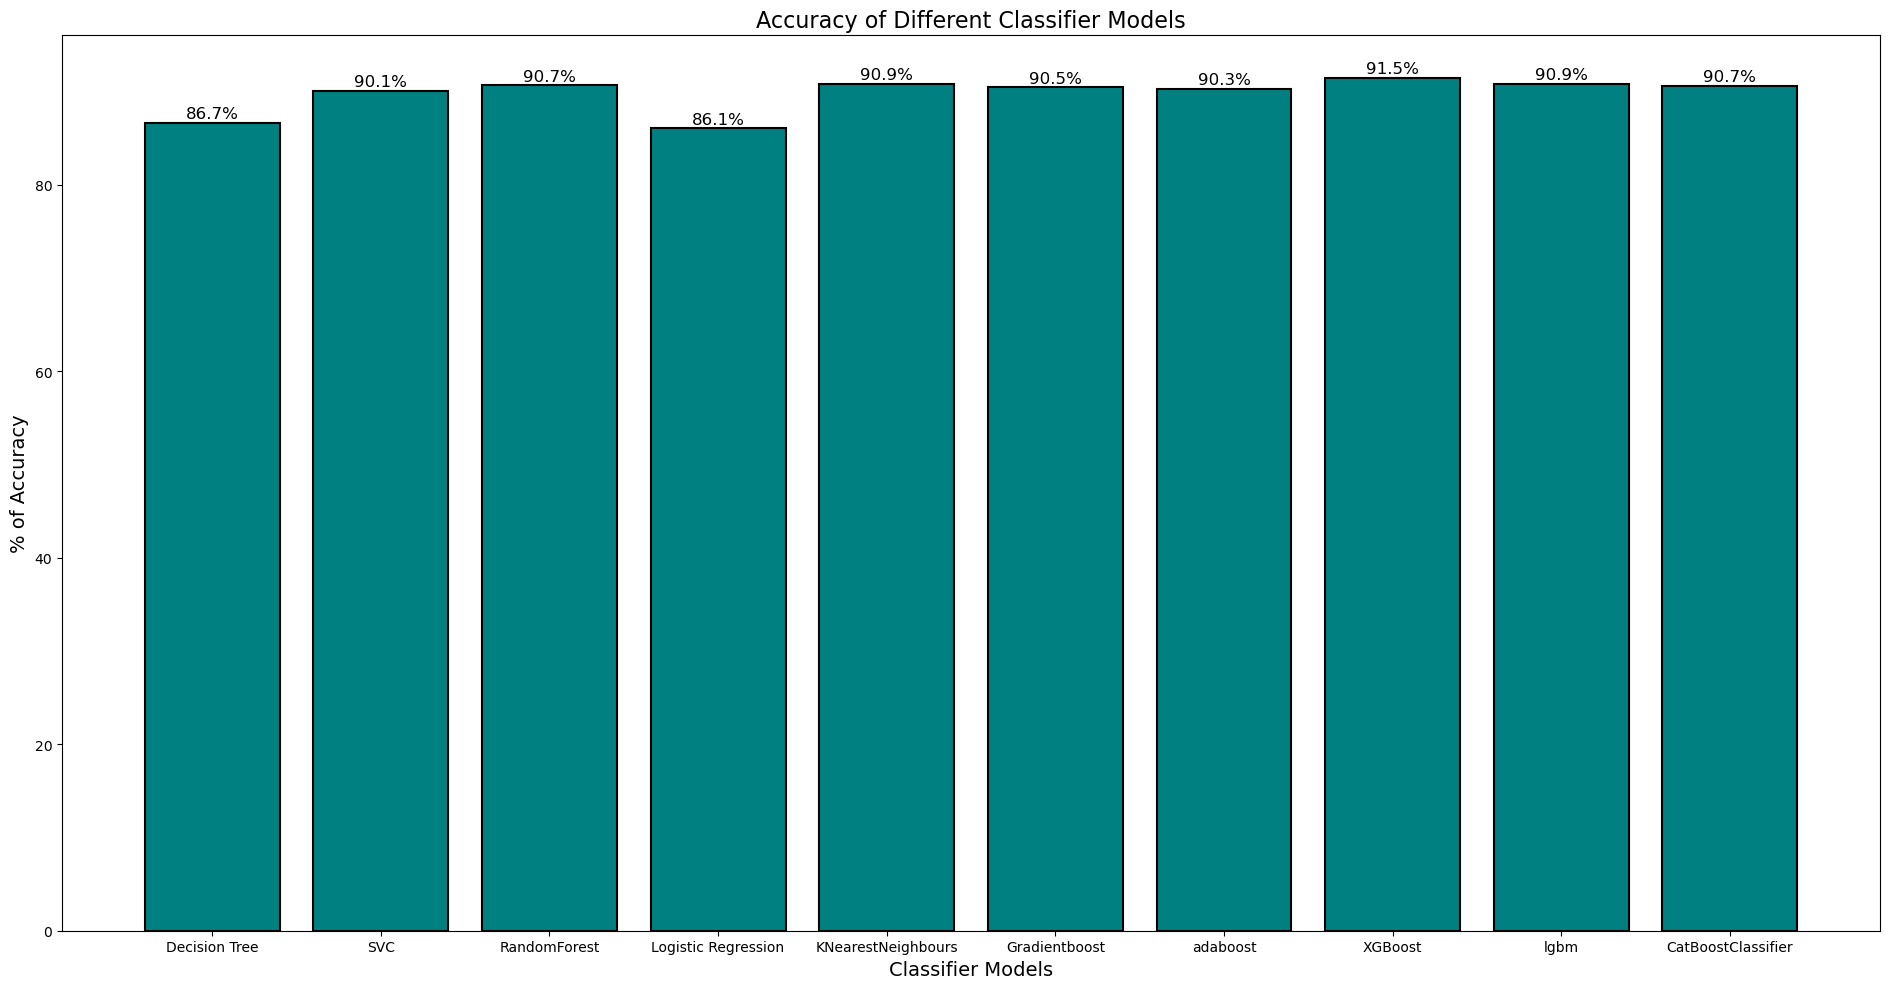

In [31]:
dt = best_estimators[0]
svm = best_estimators[1]
rf = best_estimators[2]
lr = best_estimators[3]
knn = best_estimators[4]
gb=best_estimators[5]
ada=best_estimators[6]
xg=best_estimators[7]
lgbm=best_estimators[8]
cat=best_estimators[9]

model_list = ['Decision Tree','SVC','RandomForest','Logistic Regression','KNearestNeighbours','Gradientboost','adaboost','XGBoost','lgbm','CatBoostClassifier']

plt.figure(figsize=(19, 10))
plt.bar(model_list, cv_results, color='teal', edgecolor='black', linewidth=1.5)

# Add labels and title
plt.title('Accuracy of Different Classifier Models', fontsize=16)
plt.xlabel('Classifier Models', fontsize=14)
plt.ylabel('% of Accuracy', fontsize=14)

# Annotate each bar with its value
for i, value in enumerate(cv_results):
    plt.text(i, value + 0.5, f"{value:.1f}%", ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [33]:
import pickle

model_filename = "XGBoost.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(rf, file)

print(f"XGBoost model saved to {model_filename}")


XGBoost model saved to XGBoost.pkl


In [37]:
import joblib
import xgboost as xgb

# Assuming xgboost model (xg) is already trained
joblib.dump(xg, 'xgboost_model.joblib')  # Save the model in joblib format


['xgboost_model.joblib']

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='gini', max_depth=10, max_features='auto', n_estimators=500)

model.fit(X_train, y_train)

# Save the model
with open('Randomforest.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'Random_Forest.pkl'")

InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

In [26]:
pip install catboost


   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   --- ------------------------------------ 8.9/101.7 MB 50.3 MB/s eta 0:00:02
   -------- ------------------------------- 20.4/101.7 MB 51.6 MB/s eta 0:00:02
   ---------- ----------------------------- 26.2/101.7 MB 42.6 MB/s eta 0:00:02
   ----------- ---------------------------- 30.4/101.7 MB 37.8 MB/s eta 0:00:02
   ------------ --------------------------- 30.7/101.7 MB 29.9 MB/s eta 0:00:03
   ------------ --------------------------- 30.9/101.7 MB 25.2 MB/s eta 0:00:03
   ------------ --------------------------- 31.5/101.7 MB 21.2 MB/s eta 0:00:04
   ------------ --------------------------- 32.0/101.7 MB 19.2 MB/s eta 0:00:04
   ------------ --------------------------- 32.8/101.7 MB 17.2 MB/s eta 0:00:05
   ------------- -------------------------- 33.3/101.7 MB 16.4 MB/s eta 0:00:05
   ------------- -------------------------- 33.8/101.7 MB 14.7 MB/s eta 0:00:05
   ------------- -------------------------- 35.1/

In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Collecting xgboost
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   -- ------------------------------------- 8.4/124.9 MB 57.6 MB/s eta 0:00:03
   ------ --------------------------------- 19.9/124.9 MB 48.4 MB/s eta 0:00:03
   --------- ------------------------------ 28.6/124.9 MB 46.5 MB/s eta 0:00:03
   --------- ------------------------------ 29.6/124.9 MB 39.1 MB/s eta 0:00:03
   --------- ------------------------------ 29.9/124.9 MB 32.7 MB/s eta 0:00:03
   --------- ------------------------------ 30.4/124.9 MB 25.1 MB/s eta 0:00:04
   --------- ------------------------------ 30.9/124.9 MB 21.1 MB/s eta 0:00:05
   ---------- ----------------------------- 31.5/124.9 MB 18.5 MB/s eta 0:00:06
   ---------- ----------------------------- 32.0/124.9 MB 16.5 MB/s eta 0:00:06
   ---------- ----------------------------- 32.5/124.9 MB 15.4 MB/s eta 0:00:07
   ---------- ----------------------------- 33

In [29]:
pip install lightgbm


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 19.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
